In [1]:
import pandas as pd
import os
import integrate_data
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
processed_data_path="data/processed"
players=pd.read_csv('data/processed/players.csv')
salary_data=pd.read_csv('data/processed/salary_data.csv')
team_table=pd.read_csv('data/processed/team_table.csv')

In [3]:
#Fantasy Point: An advanced metric for player performance calculation as per NBA official website
FP = {
    'PTS': 1,    
    'AST': 1.5,  
    'TRB': 1.2, 
    'STL': 3,
    'BLK': 3,
    'TOV':-1
}


# Fantasy points for each player
players['Fantasy Points'] = players[['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV']].mul(FP).sum(axis=1)


# PER formula an advanced metric to determine player performance
uPER_coeffs = {
    
    'PTS': 0.667,
    'FG': 1,
    'MP':1.5,
    'FGA': -0.5,
    'FT': 0.5,
    'TRB': 0.75,
    'AST': 1,
    'STL': 1,
    'BLK': 1.5,
    'PF': -1,
    'TOV': -1
}


# PER calculations for each player
uPER = sum((players[col] * coeff)*(1/players['MP']) for col, coeff in uPER_coeffs.items())
players['uPER'] = uPER


# True Shooting (TS) an advanced metric for determining player performance
TS_coeffs = {
    'PTS': 1,
    'FGA': 2,
    'FTA': 0.44
}


# Calculate True Shooting % for each player 
TS_percentage = players['PTS'] / (TS_coeffs['FGA'] + TS_coeffs['FTA'] * 0.44)
players['TS%'] = TS_percentage


# Compute a composite score for each player using parameters like FP, PER, TS, eFG
players['Composite Score'] = players[['Fantasy Points', 'uPER', 'TS%', 'eFG%']].sum(axis=1)
players

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Fantasy Points,uPER,TS%,Composite Score
0,Precious Achiuwa,C,23.0,Toronto,55.0,12.0,20.7,3.6,7.3,0.485,...,0.9,0.6,0.5,1.1,1.9,9.2,19.95,2.013836,4.194019,26.678855
1,Steven Adams,C,29.0,Memphis,42.0,42.0,27.0,3.7,6.3,0.597,...,2.3,0.9,1.1,1.9,2.3,8.6,29.95,2.096711,3.920496,36.564207
2,Bam Adebayo,C,25.0,Miami,75.0,75.0,34.6,8.0,14.9,0.540,...,3.2,1.2,0.8,2.5,2.8,20.4,39.74,2.179387,9.299781,51.760168
3,Ochai Agbaji,SG,22.0,Utah,59.0,22.0,20.5,2.8,6.5,0.427,...,1.1,0.3,0.3,0.7,1.7,7.9,13.17,1.807039,3.601386,19.110425
4,Santi Aldama,PF,22.0,Memphis,77.0,20.0,21.8,3.2,6.8,0.470,...,1.3,0.6,0.6,0.8,1.9,9.0,19.51,1.968028,4.102845,26.140872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,Thaddeus Young,PF,34.0,Toronto,54.0,9.0,14.7,2.0,3.7,0.545,...,1.4,1.0,0.1,0.8,1.6,4.4,12.72,1.888422,2.005835,17.175257
432,Trae Young,PG,24.0,Atlanta,73.0,73.0,34.8,8.2,19.0,0.429,...,10.2,1.1,0.1,4.1,1.4,26.2,44.60,2.312511,11.943837,59.341348
433,Omer Yurtseven,C,24.0,Miami,9.0,0.0,9.2,1.8,3.0,0.593,...,0.2,0.2,0.2,0.4,1.8,4.4,8.62,1.933130,2.005835,13.206966
434,Cody Zeller,C,30.0,Miami,15.0,2.0,14.5,2.5,3.9,0.627,...,0.7,0.2,0.3,0.9,2.2,6.5,13.31,1.993828,2.963166,18.893993


In [4]:
#Rank players according to their respective Composite Score, rank top 5 players in each team
players['Rank'] = players.groupby('Team')['Composite Score'].rank(ascending=False)
players = players.groupby('Team').apply(lambda x: x.nlargest(5, 'Composite Score'))

# Compute overall rank across all teams
players['Overall Rank'] = players['Composite Score'].rank(ascending=False)

# Reset index and remove 
players.reset_index(drop=True, inplace=True)
players

,Player,Pos,Age,Team,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Fantasy Points,uPER,TS%,Composite Score,Rank,Overall Rank
0,Trae Young,PG,24.0,Atlanta,73.0,73.0,34.8,8.2,19.0,0.429,...,0.1,4.1,1.4,26.2,44.60,2.312511,11.943837,59.341348,1.0,12.0
1,Dejounte Murray,SG,26.0,Atlanta,74.0,74.0,36.4,8.3,17.8,0.464,...,0.3,2.2,1.4,20.5,39.21,2.119464,9.345368,51.188833,2.0,36.0
2,Clint Capela,C,28.0,Atlanta,65.0,63.0,26.6,5.4,8.2,0.653,...,1.2,0.8,2.1,12.0,31.45,2.201278,5.470460,39.774738,3.0,86.0
3,John Collins,PF,25.0,Atlanta,71.0,71.0,30.0,5.1,10.0,0.508,...,1.0,1.1,3.1,13.1,26.40,1.960423,5.971918,34.889342,4.0,111.0
4,De'Andre Hunter,SF,25.0,Atlanta,67.0,67.0,31.7,5.7,12.3,0.461,...,0.3,1.2,3.0,15.4,23.74,1.891855,7.020423,33.174278,5.0,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Kristaps Porziņģis,C,27.0,Washington,65.0,65.0,32.6,7.8,15.7,0.498,...,1.5,2.1,3.0,23.2,42.43,2.272221,10.576222,55.843443,1.0,24.0
146,Bradley Beal,SG,29.0,Washington,50.0,50.0,33.5,8.9,17.6,0.506,...,0.7,2.9,2.1,23.2,37.88,2.179087,10.576222,51.186308,2.0,37.0
147,Kyle Kuzma,PF,27.0,Washington,64.0,64.0,35.0,8.0,17.8,0.448,...,0.5,3.0,2.3,21.2,35.69,2.064011,9.664478,47.936490,3.0,47.0
148,Monte Morris,PG,27.0,Washington,62.0,61.0,27.3,4.0,8.3,0.480,...,0.2,1.0,1.2,10.3,24.03,2.008062,4.695478,31.288540,4.0,134.0


In [5]:
#Compute cumulative composite score for each team
team_cscore = players.groupby('Team')['Composite Score'].sum().reset_index()
team_cscore.columns = ['Team', 'Composite Score']

In [6]:
#Call merge data function from integrate.py script to add cummulative composite score for each team in team data
team_table=integrate_data.merge_data(team_table,team_cscore)

In [7]:
# In Cap Salary remove the dollar sign and change it's datatype to int
team_table['Cap Salary'] = team_table['Cap Salary'].replace('[\$,]', '', regex=True)
team_table['Cap Salary'] = team_table['Cap Salary'].astype(int)
team_table

,Rank,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Cap Salary,Composite Score
0,1.0,Sacramento,82,19830,3573,7232,0.494,1128,3060,0.369,...,2699,3481,2237,574,275,1106,1616,9898,139423615,214.080923
1,2.0,Golden State,82,19830,3538,7393,0.479,1363,3540,0.385,...,2793,3657,2446,588,323,1336,1757,9753,192386134,228.121867
2,3.0,Atlanta,82,19855,3658,7574,0.483,882,2505,0.352,...,2719,3639,2049,580,401,1060,1541,9711,149836313,218.368538
3,4.0,Boston,82,19980,3460,7278,0.475,1315,3492,0.377,...,2921,3717,2186,521,430,1095,1542,9671,178633307,229.840497
4,5.0,Oklahoma City,82,19855,3533,7590,0.465,995,2797,0.356,...,2645,3579,2002,676,341,1069,1722,9633,148856338,212.497617
5,6.0,LA Lakers,82,19880,3516,7298,0.482,885,2558,0.346,...,2930,3748,2072,526,378,1154,1466,9608,169391473,221.144831
6,7.0,Utah,82,19805,3485,7365,0.473,1094,3099,0.353,...,2794,3762,2129,500,429,1259,1679,9600,148738241,207.751965
7,8.0,Milwaukee,82,19830,3504,7411,0.473,1217,3306,0.368,...,3074,3988,2115,521,403,1199,1481,9589,182930771,240.566254
8,9.0,Memphis,82,19780,3585,7551,0.475,985,2807,0.351,...,2835,3823,2135,680,473,1116,1643,9587,127139520,228.996020
9,10.0,Indiana,82,19755,3444,7345,0.469,1112,3030,0.367,...,2575,3407,2213,631,478,1225,1741,9535,125706114,206.903100


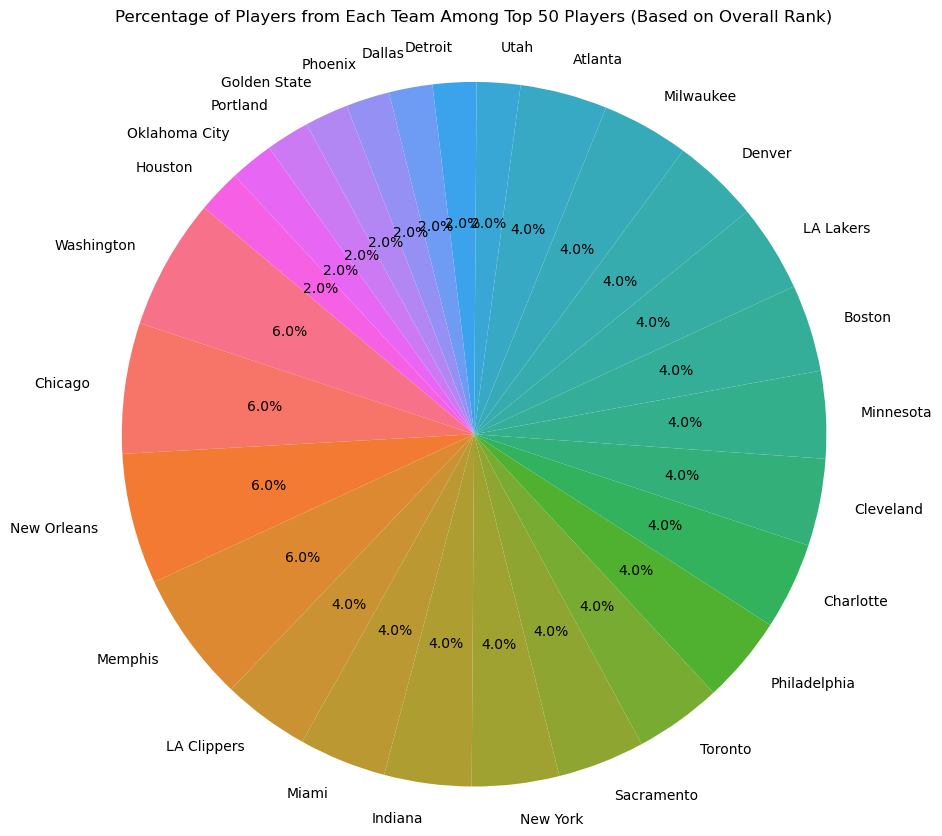

In [8]:
# Find the top 50 players as per their overall rank
top_50_players = players.sort_values(by='Overall Rank').head(50)
#Count how many of these players belong to each team
team_counts = top_50_players['Team'].value_counts()

#Plot a pie chart representating the distribution of players of each team in top 50 players
custom_palette = sns.color_palette("husl", len(players['Team'].unique()))
plt.figure(figsize=(10, 10))
plt.pie(team_counts, labels=team_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title('Percentage of Players from Each Team Among Top 50 Players (Based on Overall Rank)',pad=20)
plt.axis('equal')  
plt.show()

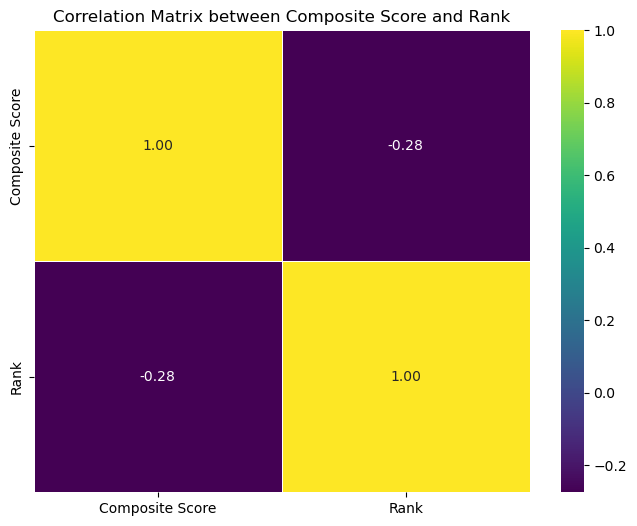

In [9]:
# Correlation Matrix to determine relation between Cummulative Team Composite Rank and Team Rank
correlation_matrix = team_table[['Composite Score', 'Rank']].corr()

# Display correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Composite Score and Rank')
plt.show()

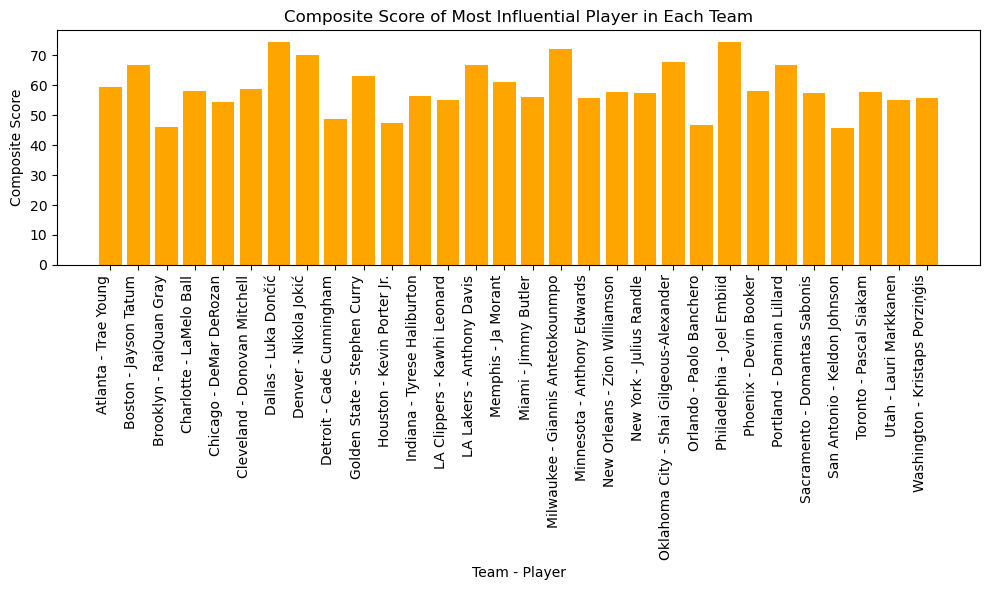

In [10]:
# Group the data by team and find the player with the highest Composite Score in each team
most_influential_players = players.groupby('Team').apply(lambda x: x.loc[x['Composite Score'].idxmax()])

# Plot the Composite Score of the most influential player in each team
plt.figure(figsize=(10, 6))
plt.bar(most_influential_players['Team'] + ' - ' + most_influential_players['Player'], most_influential_players['Composite Score'], color='orange')
plt.title('Composite Score of Most Influential Player in Each Team')
plt.xlabel('Team - Player')
plt.ylabel('Composite Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

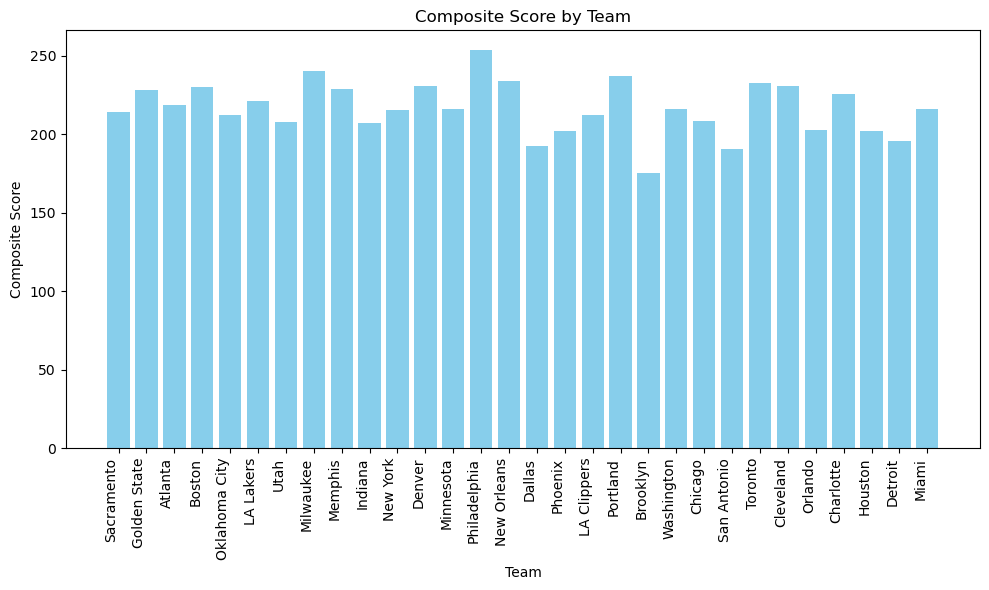

In [11]:
#Plot a graph dispalying the cummulative composite as per team
plt.figure(figsize=(10, 6))
plt.bar(team_table['Team'], team_table['Composite Score'], color='skyblue')
plt.title('Composite Score by Team')
plt.xlabel('Team')
plt.ylabel('Composite Score')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

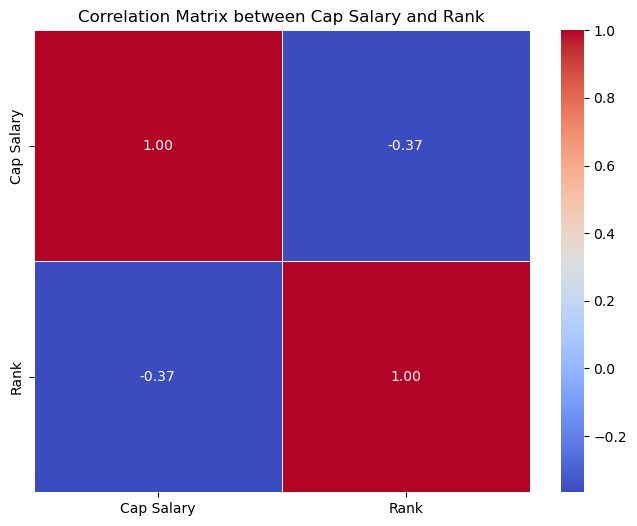

In [12]:
# Correlation Matrix to determine relation between Cap Salary and Team Rank
correlation_matrix = team_table[['Cap Salary', 'Rank']].corr()

# Display correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Cap Salary and Rank')
plt.show()

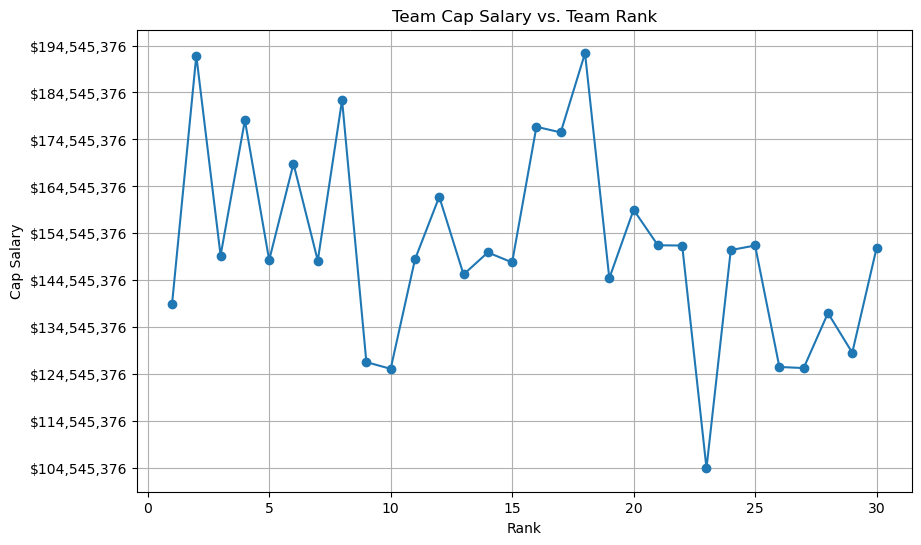

In [13]:
# Plot team cap salary vs. team rank as a line plot
plt.figure(figsize=(10, 6))
plt.plot(team_table['Rank'], team_table['Cap Salary'], marker='o', linestyle='-')
plt.title('Team Cap Salary vs. Team Rank')
plt.xlabel('Rank')
plt.ylabel('Cap Salary')

# custom y-axis to reduce the gap between points
plt.ylim(min(team_table['Cap Salary']) - 5000000, max(team_table['Cap Salary']) + 5000000)
plt.yticks(range(int(min(team_table['Cap Salary'])), int(max(team_table['Cap Salary'])) + 10000000, 10000000))

# Display y-axis labels as complete dollar values
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
plt.grid(True)
plt.show()

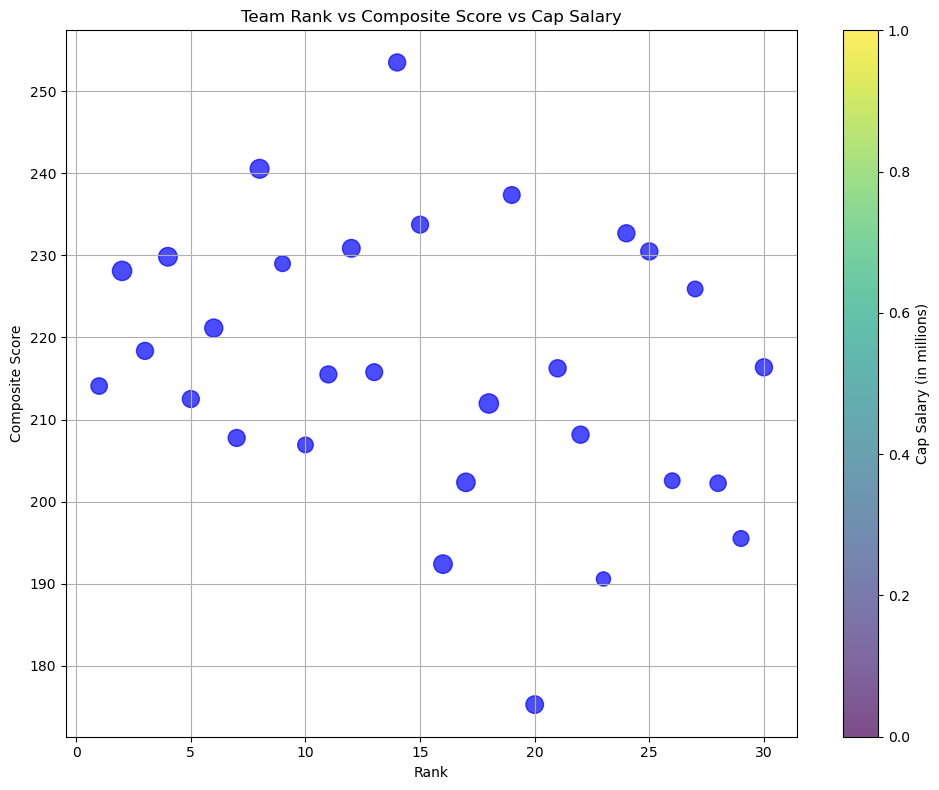

In [14]:
# Plot team rank vs composite score vs cap salary
# X-axis (Rank): The rank of each team. 
# Y-axis (Composite Score): The composite score for each team.
# Size of Points (Cap Salary): The size of each point on the plot corresponds to the cap salary of the team. Larger points represent teams with higher cap salaries, while smaller points represent teams with lower cap salaries.
plt.figure(figsize=(10, 8))
plt.scatter(team_table['Rank'], team_table['Composite Score'], s=team_table['Cap Salary'] / 1000000, alpha=0.7, c='blue')
plt.title('Team Rank vs Composite Score vs Cap Salary')
plt.xlabel('Rank')
plt.ylabel('Composite Score')
plt.colorbar(label='Cap Salary (in millions)')
plt.grid(True)
plt.tight_layout()
plt.show()